In [14]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.constants as csts

%matplotlib notebook

In [3]:
def N_n(beta_e, n=1, N0=1):
    """
    Calculates the number of atoms after n evaporation steps with cutoff
    energy epsilon / k T = beta_e .
    """
    Nfrac = (1 - np.exp(-beta_e))
    return N0 * (Nfrac)**n

def E_n(beta_e, n=1, E0=1):
    """
    Calculates the total energy of atoms after n evaporation steps with cutoff
    energy epsilon / k T = beta_e .
    """
    nom = 1 + beta_e
    denom = np.exp(beta_e)
    Efrac = nom/denom
    return E0 * (1 - Efrac)**n

6 cooling steps
27 cooling steps
307 cooling steps
10141 cooling steps


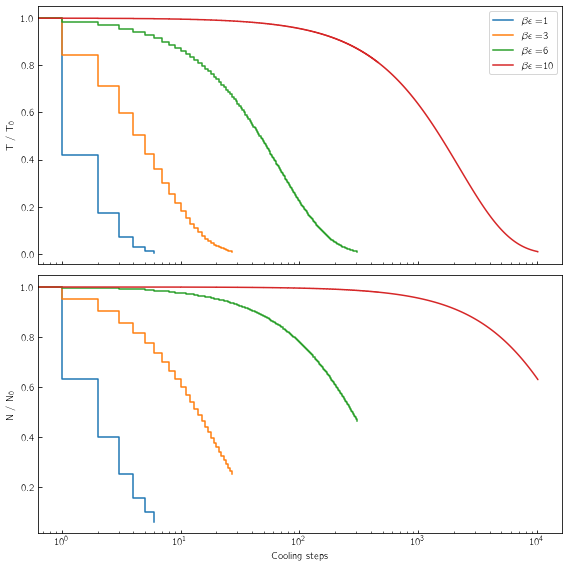

In [13]:
cutoff_es = [1, 3, 6, 10]
linestyles = ['-', ':', '--', '-.']
target_T = 0.01

fig, axe = plt.subplots(nrows=2, sharex=True, figsize=(8,8))

for i, beta_e in enumerate(cutoff_es):
    steps = []
    Ns = []
    Ts = []
    for n in range(100000):
        N = N_n(beta_e, n=n)
        E = E_n(beta_e, n=n)
        T = E/N
        
        steps.append(n)
        Ns.append(N)
        Ts.append(T)
        if T < target_T:
            print('{} cooling steps'.format(n))
            break
            
    p = axe[0].step(steps, Ts, label=r'$\beta \epsilon = $'+ str(beta_e), where='post')
    c = p[0].get_color()
    axe[1].step(steps, Ns, color=c, where='post')

axe[0].set_ylabel(' T / T$_0$')
axe[1].set_ylabel(' N / N$_0$')
axe[1].set_xlabel('Cooling steps')

axe[0].set_xscale('log')
axe[0].set_xscale('log')

#axe[0].set_yscale('log')
#axe[1].set_yscale('log')

axe[0].legend()

fig.tight_layout()

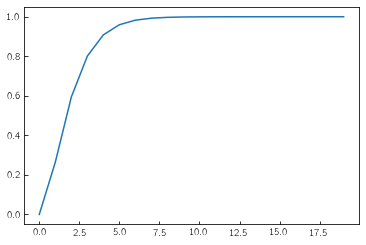

In [37]:
betae = np.arange(20)
fig, axe = plt.subplots()
axe.plot(betae,E_n(betae))

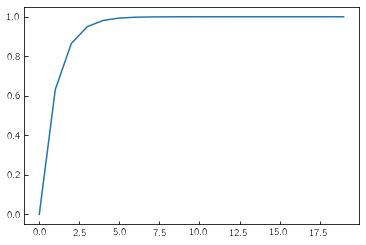

In [38]:
fig, axe = plt.subplots()
axe.plot(betae, N_n(betae))

In [16]:
csts.hbar * 100 * (4e6)**(1/3) / csts.Boltzmann

1.2124942450355323e-07